### Machine Learning
##### Chapter 8. 신경망, 딥러닝의 응용 (필기체 숫자 인식)

8.1 MNIST 데이터베이스

In [22]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

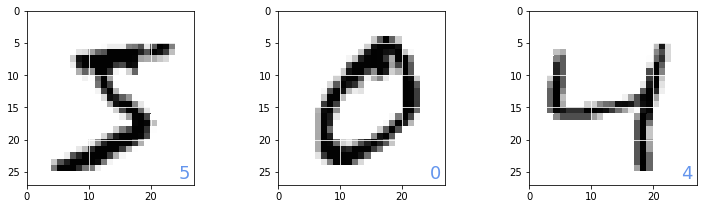

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

8.2 2층 피드 포워드 네트워크 모델

In [26]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [27]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [28]:
import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 8ms/step - loss: 2.1865 - accuracy: 0.2555 - val_loss: 1.7285 - val_accuracy: 0.6550
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 1.6352 - accuracy: 0.6967 - val_loss: 1.3614 - val_accuracy: 0.7954
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 1.3081 - accuracy: 0.7955 - val_loss: 1.1070 - val_accuracy: 0.8296
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0744 - accuracy: 0.8267 - val_loss: 0.9271 - val_accuracy: 0.8518
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9038 - accuracy: 0.8491 - val_loss: 0.7962 - val_accuracy: 0.8675
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7835 - accuracy: 0.8615 - val_loss: 0.6983 - val_accuracy: 0.8782
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.8699 - val_loss: 0.6243 - val_accuracy: 0.8851
Epoch 8/10
60/60 [==

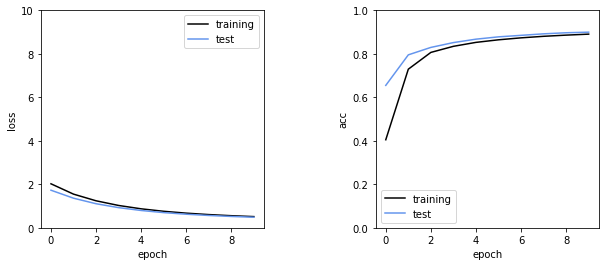

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

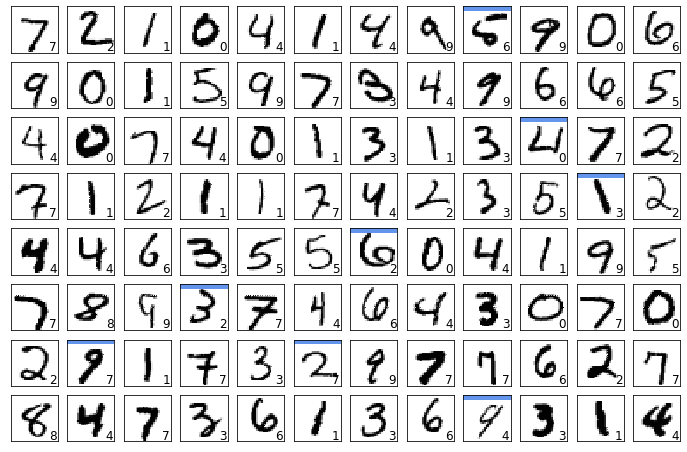

In [33]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

8.3 ReLU 활성화 함수

In [34]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 7ms/step - loss: 1.9835 - accuracy: 0.3537 - val_loss: 0.9738 - val_accuracy: 0.7859
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8318 - accuracy: 0.8097 - val_loss: 0.5367 - val_accuracy: 0.8698
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.5115 - accuracy: 0.8727 - val_loss: 0.4080 - val_accuracy: 0.8949
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4078 - accuracy: 0.8924 - val_loss: 0.3499 - val_accuracy: 0.9051
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3459 - accuracy: 0.9050 - val_loss: 0.3129 - val_accuracy: 0.9166
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.9134 - val_loss: 0.2908 - val_accuracy: 0.9200
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.9197 - val_loss: 0.2766 - val_accuracy: 0.9230
Epoch 8/10
60/60 [==

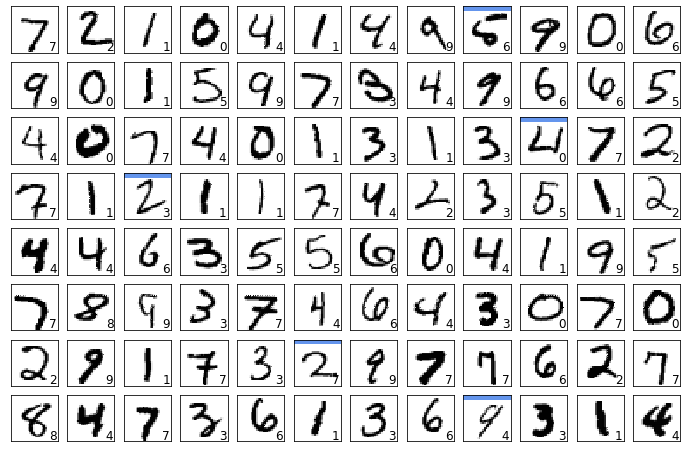

In [35]:
show_prediction()
plt.show()

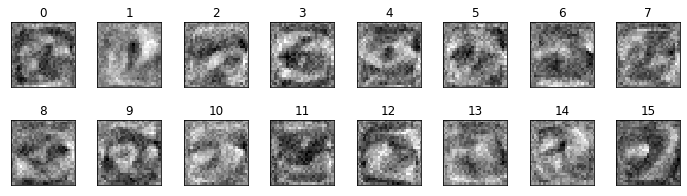

In [36]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

8.4 공간 필터

In [37]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [39]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

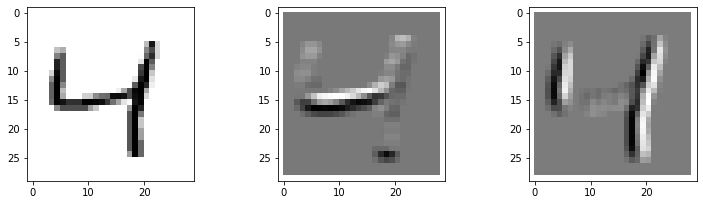

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfill1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype=float)
myfill2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfill1.reshape(-1))
        out_img2[ih+1, iw+1] = np.dot(img_part.reshape(-1), myfill2.reshape(-1))

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

8.5 합성곱 신경망

In [49]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])
print('Computation time: {0:.3f} sec'.format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 13s 213ms/step - loss: 1.4863 - accuracy: 0.6498 - val_loss: 0.3622 - val_accuracy: 0.9018
Epoch 2/20
60/60 [==============================] - 13s 218ms/step - loss: 0.3460 - accuracy: 0.9007 - val_loss: 0.2656 - val_accuracy: 0.9230
Epoch 3/20
60/60 [==============================] - 13s 216ms/step - loss: 0.2660 - accuracy: 0.9263 - val_loss: 0.2229 - val_accuracy: 0.9366
Epoch 4/20
60/60 [==============================] - 12s 204ms/step - loss: 0.2192 - accuracy: 0.9388 - val_loss: 0.1943 - val_accuracy: 0.9448
Epoch 5/20
60/60 [==============================] - 13s 210ms/step - loss: 0.1920 - accuracy: 0.9464 - val_loss: 0.1695 - val_accuracy: 0.9547
Epoch 6/20
60/60 [==============================] - 12s 204ms/step - loss: 0.1653 - accuracy: 0.9550 - val_loss: 0.1508 - val_accuracy: 0.9594
Epoch 7/20
60/60 [==============================] - 13s 218ms/step - loss: 0.1380 - accuracy: 0.9614 - val_loss: 0.1325 - val_accuracy: 0.9639

In [50]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

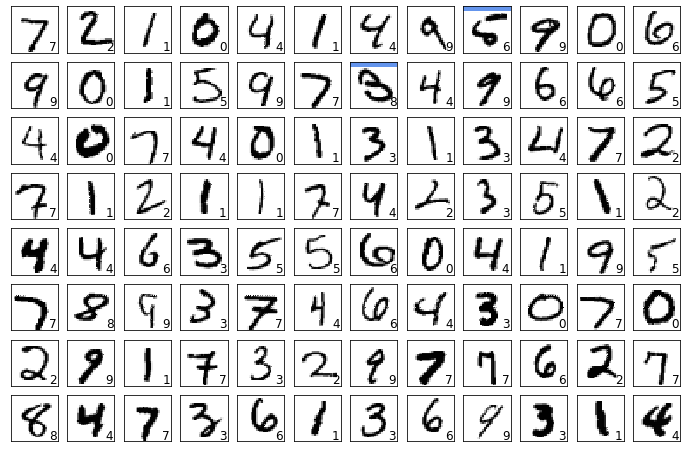

In [51]:
show_prediction()
plt.show()

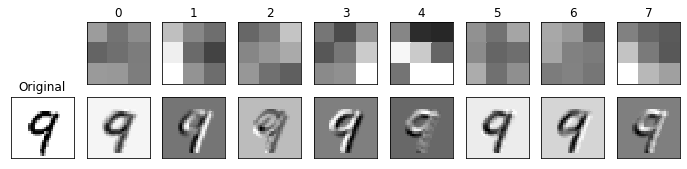

In [56]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

8.8 MNIST 인식 네트워크 모델

In [59]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test acc:', score[1])
print('Computation time:{0:.3f} sec'.format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 44s 735ms/step - loss: 1.3687 - accuracy: 0.5578 - val_loss: 0.1627 - val_accuracy: 0.9516
Epoch 2/20
60/60 [==============================] - 68s 1s/step - loss: 0.1866 - accuracy: 0.9431 - val_loss: 0.0769 - val_accuracy: 0.9763
Epoch 3/20
60/60 [==============================] - 66s 1s/step - loss: 0.1059 - accuracy: 0.9671 - val_loss: 0.0541 - val_accuracy: 0.9824
Epoch 4/20
60/60 [==============================] - 49s 822ms/step - loss: 0.0836 - accuracy: 0.9751 - val_loss: 0.0415 - val_accuracy: 0.9881
Epoch 5/20
60/60 [==============================] - 68s 1s/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 6/20
60/60 [==============================] - 63s 1s/step - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0308 - val_accuracy: 0.9899
Epoch 7/20
60/60 [==============================] - 56s 930ms/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 8/20


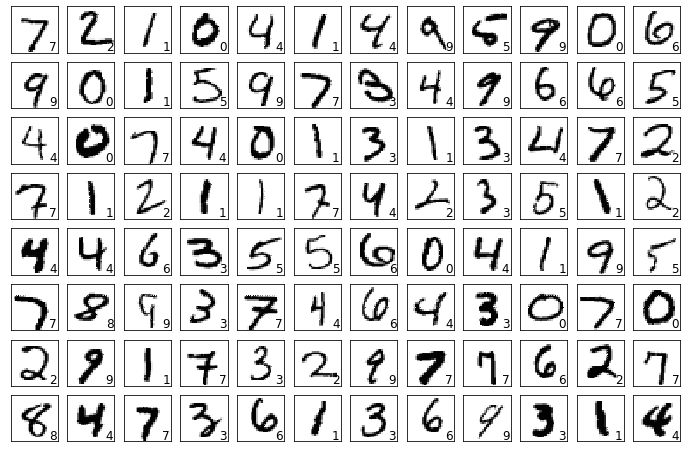

In [60]:
show_prediction()
plt.show()